## Task 5 and Task 6

### Represent feature extracted image in sparse representation using Dl

In [1]:
# In order to upload
#However I find the next cell better for this task
#uploaded = files.upload()

#### Get the image used in Task3 and the dictionary file

In [3]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#https://drive.google.com/file/d/13hOJmMQvd8qEx1uZbQzC_14Uv98omW6z/view?usp=sharing
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#Getting the image used in Task 3
file_id1 = '1iZoC_Ug4Nkx9Uxly2oEXvW1cwySbUfgv'
downloaded1 = drive.CreateFile({'id': file_id1})
downloaded1.GetContentFile('Task3.jpg')
#Getting the dictionary file
file_id2 = '19EHG3Pd08LXEYzjM7w7mw7Y1-FSFiW5M'
downloaded2 = drive.CreateFile({'id': file_id2})
downloaded2.GetContentFile('Dictonary.mat') 

# print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Import basic libraries

In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import scipy.io

In [5]:
y_temp = cv2.imread('Task3.jpg')
y_temp.shape

(373, 373, 3)

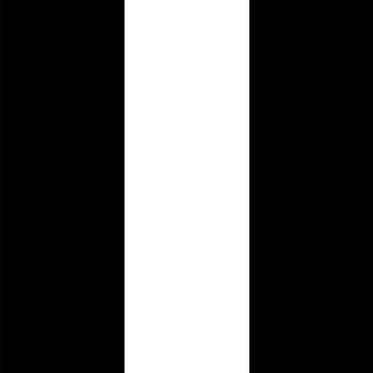

In [6]:
cv2_imshow(y_temp)

In [7]:
#Getting the file
dset = scipy.io.loadmat('Dictonary.mat')

In [8]:
#Checking the shapes
Dl = dset['Dl']
Dh = dset['Dh']
print("Shape of Dl: ",Dl.shape)
print("Shape of Dh: ",Dh.shape)

Shape of Dl:  (100, 512)
Shape of Dh:  (25, 512)


#### Getting the class from task 2 and functions from Task 3 to extracted features in order to obtain a sparse matrix(x here)<br>
#### And then get a final super resoluted image (which is y_pred here) from Dh and the obtained sparse matrix

In [9]:
#https://drive.google.com/file/d/12xOwIDdh7vThWomXnRE_rDyrDqVL8zVz/view?usp=sharing
file_id3 = '12xOwIDdh7vThWomXnRE_rDyrDqVL8zVz'
downloaded3 = drive.CreateFile({'id': file_id3})
downloaded3.GetContentFile('Task_2.py') 

#https://drive.google.com/file/d/12rk3-qB_kHKa7V2tKolLE9nu2mlGxTrg/view?usp=sharing
file_id4 = '12rk3-qB_kHKa7V2tKolLE9nu2mlGxTrg'
downloaded4 = drive.CreateFile({'id': file_id4})
downloaded4.GetContentFile('task_3.py')

In [10]:
#To check

#Importing barbara image

#https://drive.google.com/file/d/1Jp65Rrn6UE8NQJNdWJ1JnyAB2V2k-pYC/view?usp=sharing
file_id_dg  = '1Jp65Rrn6UE8NQJNdWJ1JnyAB2V2k-pYC'
downloadeddg = drive.CreateFile({'id': file_id_dg})
downloadeddg.GetContentFile('Barbara_Ground_truth.png')

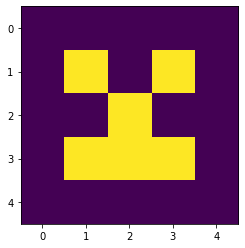

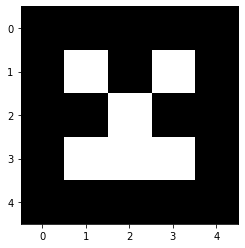

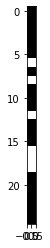

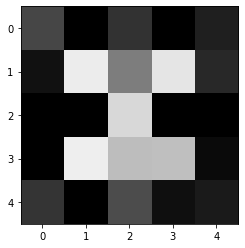

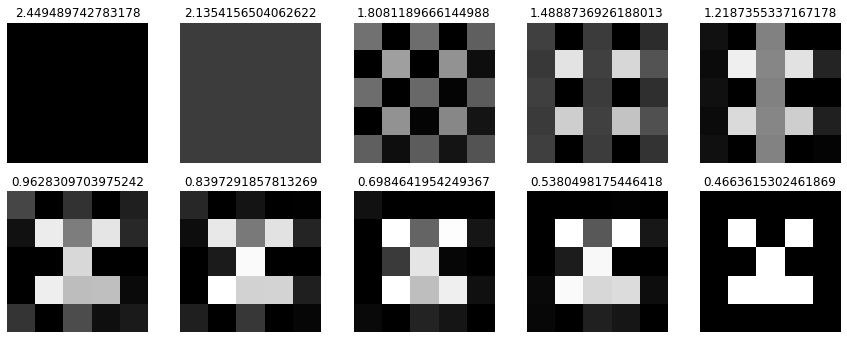

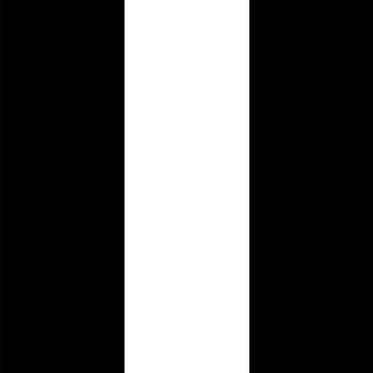

/content/task_3.py:79: RuntimeWarning: divide by zero encountered in true_divide
  im_dir = np.arctan(im_y/im_x) # gradient direction
/content/task_3.py:79: RuntimeWarning: invalid value encountered in true_divide
  im_dir = np.arctan(im_y/im_x) # gradient direction


<Figure size 432x288 with 0 Axes>

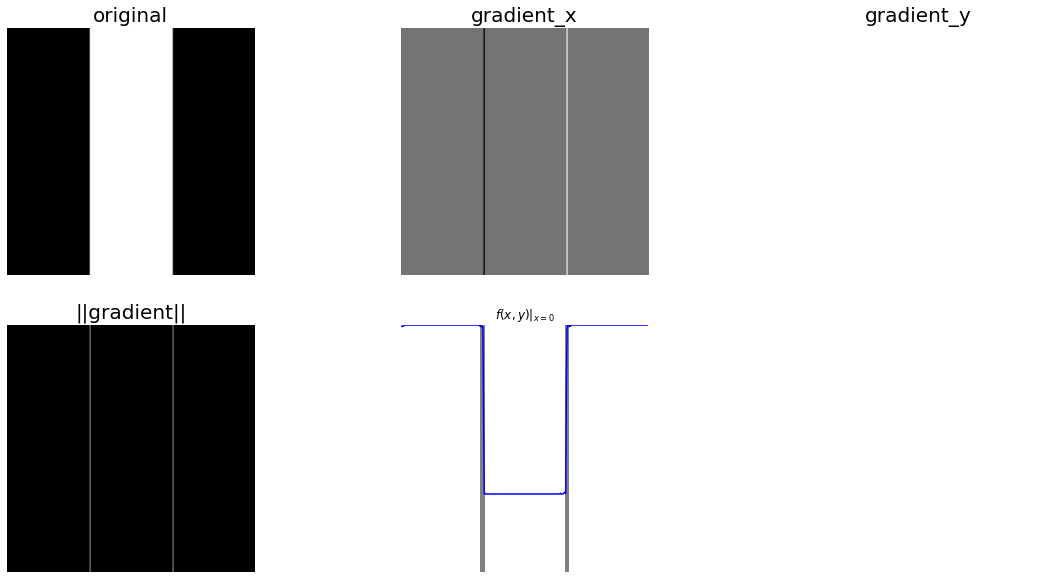

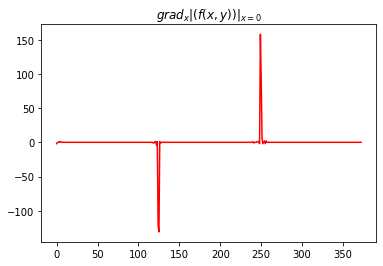

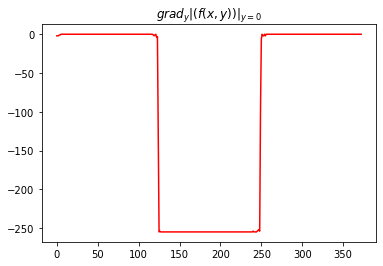

<Figure size 432x288 with 0 Axes>

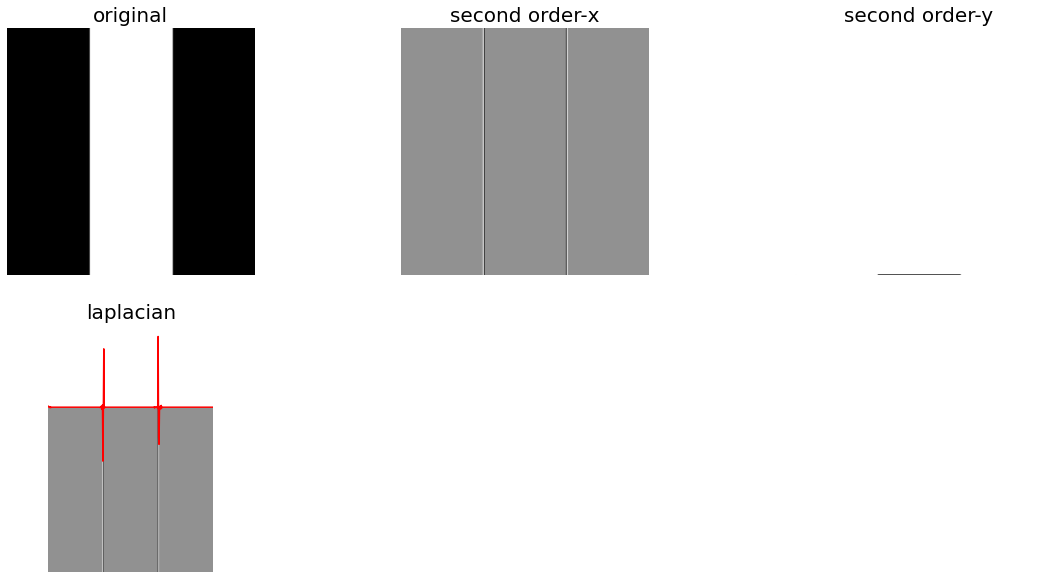

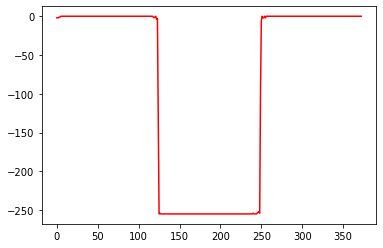

In [11]:
#Importing libs
import Task_2
import task_3
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab

### This part onwards mostly needes to be checked:

In [12]:
#First derivative feature matrices (im_x and im_y)
# im, im_x, im_y, im_mag, im_dir = task_3.first_derivatives('Task3.jpg')
im, im_x, im_y, im_mag, im_dir = task_3.first_derivatives('Barbara_Ground_truth.png')
#Second derivative feature matrices (im_secondOrder1 and im_secondOrder2)
# im, im_secondOrder1, im_secondOrder2, im_lap = task_3.second_derivatives('Task3.jpg')
im, im_secondOrder1, im_secondOrder2, im_lap = task_3.second_derivatives('Barbara_Ground_truth.png')

/content/task_3.py:79: RuntimeWarning: divide by zero encountered in true_divide
  im_dir = np.arctan(im_y/im_x) # gradient direction
/content/task_3.py:79: RuntimeWarning: invalid value encountered in true_divide
  im_dir = np.arctan(im_y/im_x) # gradient direction


In [13]:
im_secondOrder1.shape
im.shape

(256, 256)

Normalizing

In [14]:
def normalize(matrix):
  norm = (matrix-matrix.min())/(matrix.max()-matrix.min())
  return norm

In [15]:
Dl_norm = normalize(Dl)


Function to get sparse matrix x from the four features and Dl<br>
which returns a super resoluted flattened matrix, y_pred (of shape 25,1)
<br>The patches 1,2,3,4 are (5,5) patches from each feature matrix<br>
reshaped and concatenated to get patch which has (100,1) shape

In [58]:
def get_patches_obtain_sparse_and_add(feature_matrix1,feature_matrix2, feature_matrix3, feature_matrix4):

  y_pred = np.zeros(feature_matrix1.shape)
  #Dl has shape (100,512)
  N = Dl.shape[1]
  sft = feature_matrix1.shape[0]-(feature_matrix1.shape[0]%5)-5
  for i in range(0 ,sft, 1):
    for j in range(0,sft, 1):

      patch1 = feature_matrix1[i:i+5, j:j+5].reshape(25,1)
      patch2 = feature_matrix2[i:i+5, j:j+5].reshape(25,1)
      patch3 = feature_matrix3[i:i+5, j:j+5].reshape(25,1)
      patch4 = feature_matrix4[i:i+5, j:j+5].reshape(25,1)
      #y1,x1,y2,x2
      # patch = np.concatenate((patch2, patch1, patch4, patch3), axis=0)
      # patch = np.concatenate((patch3, patch1, patch4, patch2), axis=0)

      #x1,y1,x2,y2
      patch = np.concatenate((patch1, patch2, patch3, patch4), axis=0)
      patch_m = np.mean(patch)

      if(np.linalg.norm(patch)>1):
        patch = normalize(patch)

      Obtain_sparse = Task_2.obtain_sparse(Dl, patch, 5, 0.02)
      # Obtain_sparse = Task_2.obtain_sparse(Dl_norm, patch, 5, 0.01)
      a_list, i_list, ai_list = Obtain_sparse.find_x_mp()
      x = Obtain_sparse.construct_x(ai_list,N)
      # y_pred = Obtain_sparse.get_y_pred()
      # error = Obtain_sparse.calc_error()
      #Dh has shape (25,512)
      final_patch = np.dot(Dh,x) + feature_matrix1[i:i+5, j:j+5].reshape(25,1)
      y_pred[i:i+5, j:j+5] = final_patch.reshape(5,5) + patch_m
      
  # y_pred[y_pred>255] = 255
  # y_pred[y_pred<0] = 0
  return y_pred

In [17]:
#Debug trial
im_y.min()
# type(im_y[0,0])

-220

In [18]:
#Debug trial
y_ed1 = im_y
y_ed1[y_ed1<0]=0
y_ed1.max()

117

In [19]:
#Debug trial
y_ed1 = im_y
y_ed1[y_ed1<0]=0
# y_ed1[y_ed1>255]=255
y_ed2 = im_secondOrder2
y_ed2[y_ed2<0]=0

x_ed1 = im_x
x_ed1[x_ed1<0]=0
# x_ed1[x_ed1>255]=255
x_ed2 = im_secondOrder1
x_ed2[x_ed2<0]=0

y_ed1 = np.zeros(y_ed1.shape)+255
y_ed2 = np.zeros(y_ed2.shape)+255

In [59]:
y_pred = get_patches_obtain_sparse_and_add(im_x, im_y,im_secondOrder1, im_secondOrder2)
# y_pred = get_patches_obtain_sparse_and_add(x_ed1, y_ed1,x_ed2,y_ed2) #this line is for debugging

In [60]:
y_pred.shape

(256, 256)

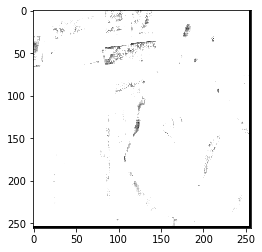

In [61]:
y_pred_resize = y_pred#.reshape((5,5))
plt.imshow(y_pred_resize,cmap='gray', vmin = 0, vmax = 1,interpolation='none')
plt.show()

In [62]:
y_orig0 = cv2.imread('Barbara_Ground_truth.png')
y_orig = cv2.cvtColor(y_orig0, cv2.COLOR_BGR2GRAY)
y_orig.shape

(256, 256)

In [24]:
from skimage import color
from skimage import io

y_orig1 = color.rgb2gray(io.imread('Barbara_Ground_truth.png'))

After getting y_pred from above method(from the feature matrices) and adding that to y_orig1(oiginal blurry image)

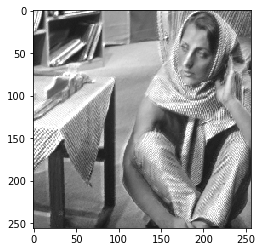

In [25]:
y_added = y_pred+y_orig1
plt.imshow(y_added,cmap='gray', vmin = 0, vmax = 255,interpolation='none')
plt.show()